<a href="https://colab.research.google.com/github/Ankur15012004/TSP-MCMC-Simulated-Annealing/blob/main/TSP_MonteCarlo_Metroplolis_Hastings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def euclidean_distance(city_1,city_2):
    """
    Calculates the euclidean distance between city_1 and city_2

    Parameters:
    city_1,city_2:np.array
        (x,y) coordinates of both cities

    Returns:
        float
            The euclidean distance.
    """

    return np.sqrt(np.sum((city_2-city_1)**2))

def total_tour_distance(cities_coordinates,tour):
    """
    Calculates the total distance for a particular tour sequence.

    Parameter:
        cities_coordinates:2d-array consisting of coordinates of the cities
        tour:Contains a particular tour sequence (example  -->[0,1,5,4])

    Returns:
        Total distance to visit all cities exactly once and return back to starting point.
    """
    total_cities=len(cities_coordinates)
    total_distance=0
    for i in range(total_cities-1):
        total_distance+=euclidean_distance(cities_coordinates[tour[i]],cities_coordinates[tour[i+1]])

    # Total returning distance from last distance to the starting point
    total_distance+=euclidean_distance(cities_coordinates[tour[-1]],cities_coordinates[tour[0]])

    return total_distance


Iteration 0: Best Distance = 745.01, Temperature = 999.0000
Iteration 100: Best Distance = 544.37, Temperature = 903.8874
Iteration 200: Best Distance = 544.37, Temperature = 817.8302
Iteration 300: Best Distance = 544.37, Temperature = 739.9663
Iteration 400: Best Distance = 544.37, Temperature = 669.5157
Iteration 500: Best Distance = 544.37, Temperature = 605.7726
Iteration 600: Best Distance = 544.37, Temperature = 548.0983
Iteration 700: Best Distance = 544.37, Temperature = 495.9150
Iteration 800: Best Distance = 544.37, Temperature = 448.7000
Iteration 900: Best Distance = 544.37, Temperature = 405.9802
Iteration 1000: Best Distance = 521.37, Temperature = 367.3277
Iteration 1100: Best Distance = 521.37, Temperature = 332.3552
Iteration 1200: Best Distance = 521.37, Temperature = 300.7124
Iteration 1300: Best Distance = 521.37, Temperature = 272.0822
Iteration 1400: Best Distance = 521.37, Temperature = 246.1779
Iteration 1500: Best Distance = 521.37, Temperature = 222.7398
Iter

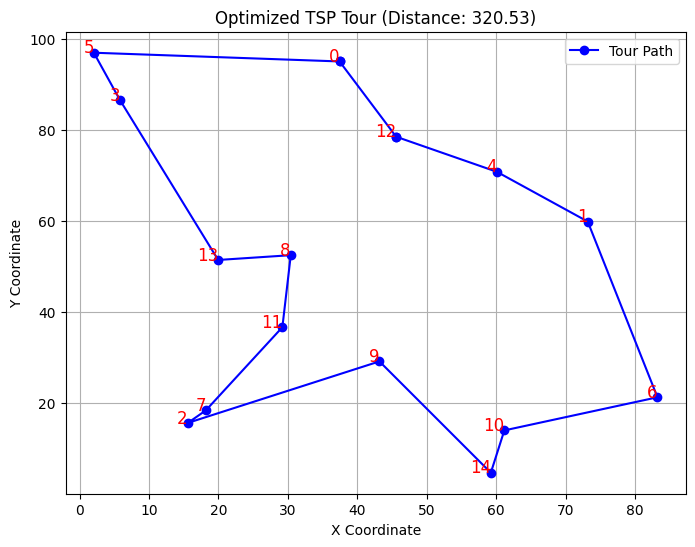


Best Tour Sequence (City Indices):
[12  4  1  6 10 14  9  2  7 11  8 13  3  5  0]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def propose_new_tour(tour):
    """
    Propose the new tour by swapping randomly selected two cities.

    Parameters:
        tour: Current tour state in our Markov chain.

    Returns:
        New tour state by randomly swapping two selected cities.
    """
    new_tour = tour.copy()
    i, j = np.random.choice(len(tour), size=2, replace=False)

    # Swapping them
    new_tour[i], new_tour[j] = new_tour[j], new_tour[i]

    return new_tour

def metropolis_hastings_accept(old_distance, new_distance, temperature):
    """
    Decides whether to accept the new proposal according to Metropolis-Hastings rule.

    Parameters:
        old_distance: Total distance of the current tour.
        new_distance: Total distance of the proposed new tour.
        temperature: A parameter for simulated annealing.

    Returns:
        bool: True if new proposal is accepted, False otherwise.
    """
    if new_distance < old_distance:
        return True  # Always accept better solutions

    acceptance_probability = np.exp((old_distance - new_distance) / temperature)

    return np.random.rand() < acceptance_probability  # Accept based on probability

def simulated_annealing_mcmc(cities, initial_temperature, cooling_rate, iterations):
    """
    Solves the Travelling Salesman Problem (TSP) using MCMC with simulated annealing.

    Parameters:
        cities: 2D array containing the coordinates of the cities.
        initial_temperature: Initial temperature for simulated annealing.
        cooling_rate: Decay factor for temperature.
        iterations: Number of iterations until the Markov chain reaches stationarity.

    Returns:
        best_tour: Sequence of city indices representing the best tour.
        best_distance: Distance corresponding to the best tour.
    """
    # Initialize the Markov Chain with a random tour
    num_cities = len(cities)
    current_tour = np.random.permutation(num_cities)
    current_distance = total_tour_distance(cities, current_tour)

    # Tracking the best tour and distance
    best_tour = current_tour.copy()
    best_distance = current_distance

    temperature = initial_temperature

    # Start the MCMC loop
    for i in range(iterations):
        # Propose a new tour
        new_tour = propose_new_tour(current_tour)
        new_distance = total_tour_distance(cities, new_tour)

        # Accept or reject the new proposal
        if metropolis_hastings_accept(current_distance, new_distance, temperature):
            current_tour = new_tour
            current_distance = new_distance

            # Update the best tour and distance if improvement is found
            if new_distance < best_distance:
                best_tour = new_tour.copy()
                best_distance = new_distance

        # Decrease the temperature (simulated annealing)
        temperature *= cooling_rate

        if i % 100 == 0:
            print(f"Iteration {i}: Best Distance = {best_distance:.2f}, Temperature = {temperature:.4f}")

    return best_tour, best_distance

def plot_tour(cities, tour, title="TSP Tour"):
    """
    Plots the given TSP tour solution in 2D.

    Parameters:
        cities: 2D array of (x, y) coordinates of cities.
        tour: Optimal tour sequence.

    Returns:
        A plotted tour visualization.
    """
    plt.figure(figsize=(8,6))

    # Reorder cities based on the best tour sequence
    ordered_cities = cities[tour]

    # Plot tour path
    plt.plot(ordered_cities[:, 0], ordered_cities[:, 1], 'bo-', label="Tour Path")

    # Connect the last city back to the first
    plt.plot([ordered_cities[-1, 0], ordered_cities[0, 0]],
             [ordered_cities[-1, 1], ordered_cities[0, 1]], 'bo-')

    # Mark city locations
    for i, (x, y) in enumerate(cities):
        plt.text(x, y, str(i), fontsize=12, ha='right', color='red')  # City labels

    plt.title(title)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Step 1: Generate random cities
    np.random.seed(42)  # For reproducibility
    num_cities = 15
    cities = np.random.rand(num_cities, 2) * 100  # Random coordinates in [0,100] x [0,100]

    # Step 2: Run MCMC Simulated Annealing for TSP
    initial_T = 1000  # Initial temperature
    cooling_rate = 0.999  # Cooling factor
    iterations = 5000  # Total iterations

    best_tour, best_distance = simulated_annealing_mcmc(cities, initial_T, cooling_rate, iterations)

    # Step 3: Plot the results
    plot_tour(cities, best_tour, title=f"Optimized TSP Tour (Distance: {best_distance:.2f})")

    # Step 4: Display best tour sequence
    print("\nBest Tour Sequence (City Indices):")
    print(best_tour)
